# Homework 8

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date:** Saturday, November 3rd, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

### Collaborators

**Joe Davison**
<br>
**Anna Davydova**
<br>
**Michael S. Emanuel**
<br>
**Dylan Randle**
<br>

<div class="answer-separator">
------------------------
</div>

In [20]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm

import pandas as pd
import seaborn as sns

%matplotlib inline

In [32]:
# Additional imports
from numpy import log, sqrt
from typing import Tuple
# Plot style
matplotlib.rcParams.update({'font.size': 20})

## Question 1: In the AM207 Nursery We Help Canadians Smoke Trees with Purple Stuff

**Some coding required**

**This is part 1 of a 2 part problem.  You'll see the second part in a later problem set...**

A plant nursery in Cambridge is exprimentally cross-breeding two types of hibiscus flowers: blue and pink. The goal is to create an exotic flower whose petals are pink with a ring of blue on each. 

There are four types of child plant that can result from this cross-breeding: 

  - Type 1: blue petals
  - Type 2: pink petals 
  - Type 3: purple petals
  - Type 4: pink petals with a blue ring on each (the desired effect). 

Out of 197 initial cross-breedings, the nursery obtained the following distribution over the four types of child plants: 

$$Y = (y_1, y_2, y_3, y_4) = (125, 18, 20, 34)$$

where $y_i$ represents the number of child plants that are of type $i$.

The nursery then consulted a famed Harvard plant geneticist, who informed them that the probability of obtaining each type of child plant in any single breeding experiment is as follows:

$$ \frac{\theta+2}{4}, \frac{1-\theta}{4}, \frac{1-\theta}{4}, \frac{\theta}{4}.$$

Unfortunately, the geneticist was unable to specify the quantity $\theta$.

Clearly, the nursery is interested in understanding how many cross-breeding they must perform, on average, in order to obtain a certain number of child plants with the exotic blue rings. To do this they must be able to compute $\theta$. 

The owners of the nursery, being top students in AM207, decided to model the experiment in hopes of discovering $\theta$ using the results from their 197 initial experiments. 

They chose to model the observed data using a multinomial model and thus calculated the likelihood to be:

$$ p(y  \vert  \theta) \propto (2+\theta)^{y_1} (1-\theta)^{y_2+y_3}  \, \theta^{y_4} $$


The nursery owners decided to augment their model and hopefully obtain a friendlier looking distribution that allows for easy EM based maximum-likelihood finding and sampling (which you will do in next week's homework).

They augment the data with a new variable $z$ such that:

$$z + (y_1 - z) = y_1.$$

That is, using the latent variable $z$, the number of type I child plants $y_1$ can be broken into two subtypes. Let the probability of obtaining the two subtype be $1/2$ and $\theta/4$, respectively. $y_1$ can now be interpreted as to be the total number of trials in a binomial trial. Thus, the new likelihood can be written as

$$ p(y, z  \vert  \theta) \propto \binom{y_{1}}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z}  (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$

Treat the augmented model as a latent variable model.

Write down an expression (up to unimportant constants - you must decide what unimportant means) for each of the following:

1.1. The observed data log likelihood $\mathcal{l}(y \ \vert \ \theta)$

1.2. The complete data log likelihood $\mathcal{L}(y, z\ \vert \ \theta)$

1.3. The Auxilary function, $Q(\theta, \theta^{(t-1)})$, or the expected complete data log likelihood, defined by

$$Q(\theta, \theta^{(t-1)}) = \mathbb{E}_{Z  \vert  Y=y, \Theta = \theta^{t-1}}[\mathcal{L}(y, z\ \vert \ \theta)]$$

1.4. Find an expression for $\theta^{t} = \text{argmax}_\theta Q(\theta, \theta^{(t-1)})$ by maximizing the Auxilary function $Q(\theta, \theta^{(t-1)})$ given $\theta, \theta^{t-1}$ to find the optimal value for $\theta^{t}$.  

**Hint:** You don't actually need to do any difficult optimization for the M-step. After taking the expectation of the complete data log likelihood in the E-step, match your $Q(\theta, \theta^{(t-1)})$ to the log pdf of a familiar distribution, then use the known formula for the mode of this distribution to optimize $Q(\theta, \theta^{(t-1)})$.

1.5. Use your forumulas from 1.3 and 1.4 for $Q(\theta, \theta^{t-1})$ and $\theta^{t}$ to calculate the maximum likelihood through Expectation Maximization (EM). In order to perform EM, you must iterate through the following steps

- (Expectation) Compute the Auxilary function, $Q(\theta, \theta^{t-1})$ (the expectation of the full data likelihood)
- (Maximization) Compute $\theta^{t} = \text{argmax}_\theta Q(\theta, \theta^{(t-1)})$

Choose your own reasonable criterion for convergence to **estimate the MLE** of $\theta$ using EM.




**Gratuitous Titular Reference**:  Canada recently became the second country in the world to [legalize marijuana](https://www.cnn.com/2018/06/20/health/canada-legalizes-marijuana/index.html).  [Purple Stuff](https://www.amazon.com/Purple-Stuff-Soda-Relaxation-Beverage/dp/B00FF4AXTE) is a health beverage available on Amazon with a name and taste that's a tip of the hat to [Purple Drank](https://en.wikipedia.org/wiki/Purple_drank), the codeine infused beverage also popularly known as *lean* and is synonymous with the Houston hip hop scene (and in particular DJ Screw and his famous Chopped and Screwed style).

**1.1.** The observed data log likelihood $\mathcal{l}(y | \theta)$ is simply the log of the likelihood function $p(y | \theta)$.  Replace the proportionality statement above with an equality where $N_{obs}$ is an unimportant normalization constant:
$$p(y|\theta) = N_{obs} (2+\theta)^{y_1} (1-\theta)^{y_2 + y_3} \theta^{y_4}$$
Taking logs and keeping in mind things we learned about logarithms in middle school,
$$\mathcal{l}(y | \theta) = y_1 \log(2+\theta) + (y_2+y_3)\log(1-\theta) + y_4 \log(\theta) + \log(N_{obs})$$
The last terms is a normalization constant that won't affect the estimate of $\theta$.

**1.2** The complete data log likelihood $\mathcal{L}(y, z | \theta)$ is another exercise in manipulating logarithms.
Once again, replace the proportionality with an exact equality where $N_{c}$ is the normalization constant for the complete data likelihood.  Then 
$$p(y, z | \theta) = N_c \binom{y_1}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z}  (1-\theta)^{y_2+y_3}  \, \theta^{y_4}$$
Let's simplify this by separating the powers of two from the terms involving $\theta$ so the only terms involving $\theta$ are $\theta$ or $1-\theta$ raised to a power.  $(1/2)^{y_1-z} = 2^{z-y_1}$ and $(1/4)^z = 2^{-2z}$ so:
$$p(y, z | \theta) = N_c \binom{y_1}{z} 2^{-(y_1+z)} \theta^{z+y_4} (1-\theta)^{y_2+y_3}$$

By definition, $\mathcal{L}(y, z | \theta) = \log( p(y, z | \theta)$ so after we take logs we find
$$\mathcal{L}(y, z | \theta) = (z+y_4) \log(\theta) + (y_2 + y_3) \log(1-\theta) + \log(N_c) + \log \binom{y_1}{z}$$
For the purposes of esimating $\theta$, only the terms involving $\theta$ matter, so we could also write this
$$\mathcal{L}(y, z | \theta) = (z+y_4) \log(\theta) + (y_2 + y_3) \log(1-\theta) + C$$
where $C$ denotes an unimportant constant.

**1.3** In this problem let's treat the complete data log likelihood to be
$$\mathcal{L}(y, z | \theta) = (z+y_4) \log(\theta) + (y_2 + y_3) \log(1-\theta)$$
i.e. we will simply ignore the constant above as it's irrelevant to what we're trying to do (EM algorithm to estimate $\theta$).

The auxiliary function $Q(\theta, \theta^{t})$ is the expectation of $\mathcal{L}(y, z | \theta)$ over the various possibilities of $z$, where the probability of each outcome for $z$ is determined by the parameter values $\theta^{t}$ in the current time step.  By choosing $\theta$ so as to maximize this, we will be performing an M-step in the EM algorithm.

$$Q(\theta, \theta^t) = \sum_{z=0}^{y_1} \mathcal{L(y,z|\theta) p(z|\theta^t)} =
\sum_{z=0}^{y_1} \left[(z+y_4)\log(\theta) + (y_2+y_3)\log(1-\theta) \right]$$
Note that the only term involving $z$ here is $z \log(\theta)$  
We can pull the rest of the terms out of the sum.  
$$Q(\theta, \theta^t) = y_4 \log(\theta) + (y_2+y_3)\log(1-\theta) \left(\sum_{z=0}^{y_1} p(z) \right)
+\log(\theta) \left(\sum_{z=0}^{y_1} zp(z) \right)$$
In the expression above, $\sum_{z=0}^{y_1} p(z) = 1$ because it's just a sum of the probability of every possible value of $z$.
Similarly, $\sum_{z=0}^{y_1} p(z|\theta^t) = E[z|\theta^t]$ is the expected value of $z$ given $\theta_t$.  We can write this more expressively as
$$ Q(\theta, \theta^t) = (\bar{z} + y_4) \log(\theta) + (y_2+y_3)\log(1-\theta)$$

We can compute this expectation quickly because we're just performing $y_1$ trials of a Bernoulli event.  The absolute probabilities across all 5 outcomes $y_i$, $z$ are $1/2$ for $z$ and $1/2 + \theta/4$ for $y_1$ not $z$.  So conditional on the flower being of type 1, the probability that $z$ is true is $\frac{2}{2+\theta}$ and the probability that $z$ is false is $\frac{\theta}{2+\theta}$. We recall that the expectation in this case is just the product of the number of trials times the success probability in each trial.  Hence 
$$E[z | \theta^t] = \bar{z} = \left(\frac{\theta^t}{2 + \theta^t}\right) y_1$$
Substituting this expression into the formula for $Q$, we find that

$$Q(\theta, \theta^t) =  \left(\left(\frac{\theta^t}{2 + \theta^t}\right) y_1 + y_4 \right)\log(θ)+(y_2+y_3)\log(1−θ)$$

**1.4** Given $\theta^t$, we want to find the optimal value $\theta$ that maximizes $Q(\theta, \theta^{t})$.  Then in the M-step of the EM algorithm we will apply the update $\theta^{t+1} = \theta$.

In the E-step, compute 
$$\bar{z} = \left(\frac{\theta^t}{2 + \theta^t}\right) y_1$$
Then we can maximize the expression below with respect to $\theta$, holding $\theta^t$ constant
\begin{align}
\frac{dQ}{d\theta} &= \frac{d}{d\theta} \left( (\bar{z} + y_4) \log(\theta) + (y_2+y_3)\log(1-\theta) \right) \\
            &= \frac{\bar{z} + y_4}{\theta} - \frac{y_2 + y_3}{1 - \theta}
\end{align}

Setting $dQ/d\theta = 0$ to find the maximum of $Q(\theta)$, we find that
\begin{align}
\frac{\bar{z} + y_4}{\theta} &= \frac{y_2 + y_3}{1 - \theta} \\
\theta &= \frac{\bar{z} + y_4}{\bar{z} + y_2 + y_3 + y_4}
\end{align}

In [23]:
# 1.5. Use your forumulas from 1.3 and 1.4 for  Q(θ,θt−1) and θt  to calculate
# the maximum likelihood through Expectation Maximization (EM). 
# In order to perform EM, you must iterate through the following steps
# (Expectation) Compute the Auxilary function,  Q(θ,θt−1)  (the expectation of the full data likelihood)
# (Maximization) Compute  θt=argmaxθQ(θ,θ(t−1)) 
# Choose your own reasonable criterion for convergence to estimate the MLE of  θ  using EM.

# Type alias
data_type = Tuple[int, int, int, int]


def log_like(Y: data_type, theta: float) -> float:
    """The log likelihood function of this data given a parameter setting theta"""
    # Unpack Y
    (y1, y2, y3, y4) = Y
    # Return the observed data likelihood from question 1.1
    return y1 * log(2.0 + theta) + (y2 + y3) * log(1.0 - theta) + y4 * log(theta)


def z_bar(theta: float, Y: data_type) -> float:
    """The E step of the EM algorithm.  Compute expected value of z from theta"""    
    # Unpack y1
    y1: int = Y[0]
    # Expected value of z
    return theta / (theta + 2.0) * y1


def theta_star(z: float, Y: data_type) -> float:
    """The M step of the EM algorithm.  Compute optimal theta given current parameters and z"""
    # Unpack Y
    (y1, y2, y3, y4) = Y
    # Weights for theta and 1-theta
    alpha: float = z + y4
    beta: float = y2 + y3
    # The optimal value of theta
    return alpha / (alpha + beta )


def EM(Y: data_type, theta: float) -> Tuple[float, int]:
    """Perform the EM algorithm to estimate theta using maximum likelihood."""
    # Maximum number of iterations
    max_iters: int = 10000
    # Threshold change in theta
    tol: float = 1e-12
    # Initialize 
    theta_prev: float = theta
    # Perform EM
    for i in range(max_iters):
        # E-step
        z: float = z_bar(theta, Y)
        # M-step
        theta = theta_star(z, Y)
        # Change in theta this step
        if abs(theta - theta_prev) < tol:
            break
        theta_prev = theta
    # Return the optimal theta and the number of iterations
    return (theta, i)


# Observed data values in this problem
(y1, y2, y3, y4) = (125, 18, 20, 34)
# Assemble these into a 4-vector
Y: data_type = (y1, y2, y3, y4)
# Total number of data points
N: int = sum(Y)
# Initial guess - based on moment matching
theta: float = ((y1 + y4) - (y2 + y3)) / N
iters: int
# Run EM on these imputs
(theta, iters) = EM(Y, theta)
# Report results
print(f'EM algorithm converged after {iters} iterations.')
print(f'Maximum likelihood estimate: theta = {theta:0.6f}.')

EM algorithm converged after 12 iterations.
Maximum likelihood estimate: theta = 0.626821.


The MLE estimate for $\theta$ is:
$$\hat{\theta} = 0.626821$$

<div class="answer-separator">
------------------------
</div>

## Question 2: Predicting the Prior Like a Punch to the Kidneys 

**Some coding required**

In this problem we will work with the US Kidney Cancer Dataset (by county), a dataset of kidney cancer frequencies across the US over 5 years on a per county basis. 

The kidney cancer data can be found [here](./kcancer.csv).

A casual inspection of the data might suggest that we independently model cancer rates for each of the provided counties.  Our experience in past homeworks/labs/lectures (in particular when we delved into the Rat Tumors problem) suggests potential drawbacks of conclusions based on raw cancer rates.  Addressing these drawbacks, let's look use a Bayesian model for our analysis of the data. In particular you will implement an Empircal Bayes model to examine the adjusted cancer rates per county.

Let $N$ be the number of counties; let $y_j$ the number of kidney cancer case for the $j$-th county, $n_j$ the population of the $j$-th county and $\theta_j$ the underlying kidney cancer rate for that county. We can construct a Bayesian model for our data as follows:
\begin{aligned}
y_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j &\sim Gamma(\alpha, \beta), \quad j = 1, \ldots, N
\end{aligned}
where $\alpha, \beta$ are hyper-parameters of the model.

2.1. Consider the **prior-predictive** distribution (also called the evidence i.e. the denominator normalization in bayes theorem) of the model: $p(y) = \int p(y \vert \theta) p(\theta) d \theta$. Why the prior-predictive? Because technically we "haven't seen" individual county data yet. And, our data are on the scale of $y$, not the rates $\theta$. Write an expression for the negative binomial prior-predictive for this model.

**Note:** Up until now we've had primarily thought about the posterior predictive: $\int p( y \vert \theta) p(\theta \vert D) d\theta$.  The posterior predictive and the prior predictive can be somewhat connected. In conjugate models such as ours, the two distributions have the same form.

2.2. Implement Empirical Bayes via moment matching by matching the mean and the variance (central moments) of the negative binomial you calclated in 2.1 to the sample mean and variance from the data.  Find appropriate expressions/values for $\alpha$ and $\beta$. 

**Hint:** You need to be careful with the $5n_j$ multiplier.

2.3. Use the values of $\alpha$ and $\beta$ you derived in 2.2 to generate 5000 posterior samples for the kidney cancer rates for each county.  Use these samples to generate a posterior mean rate for each county.

2.4. Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size. Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot add a scatter plot visualization of the posterior mean cancer rate estimates (pct mortality) vs the county population size, highlight these in green.

2.5. Using the above scatter plot, explain why using the posterior means from our model to estimate cancer rates is preferable to studying the raw rates themselves.

**Hint:** You might also find it helpful to follow the Rat Tumor example.


**Gratuitous Pop Culture Bayesian Reference**: 

![](https://www.explainxkcd.com/wiki/images/b/bd/modified_bayes_theorem.png)

**2.2**  Let's start by recalling the definitions of the Poisson Distribution, Gamma Distribution, and Gamma Function.

https://en.wikipedia.org/wiki/Poisson_distribution
$$\text{Pois}(k | \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$$

https://en.wikipedia.org/wiki/Gamma_distribution
$$\text{Gam}(\theta | \alpha, \beta) = \frac{\beta^\alpha \theta^{\alpha-1}e^{-\beta \theta}}{\Gamma(\alpha)} $$

https://en.wikipedia.org/wiki/Gamma_function
$$\Gamma(x) = \int_{t=0}^\infty t^{x-1} e^{-t} dt$$

By the definition of the prior predictive distribution
\begin{align}
p(y) &= \int_\theta p(y|\theta) p(\theta) d\theta \\
    &= \int_\theta \text{Pois}(y | \lambda(\theta)) \Gamma(\theta  |\alpha, \beta) d\theta \\
    &= \int_\theta \frac{\lambda^y e^{-y}}{y!} \frac{\beta^\alpha \theta^{\alpha-1}e^{-\beta \theta}}{\Gamma(\alpha)} d\theta
\end{align}
We are integrating with respect to $\theta$ only, so all terms that are indpendent of $\theta$ can be pulled out of the integral.  These include $(5n)^y$, $y!$, $\beta^\alpha$ and $\Gamma(\alpha)$.
$$p(y) = \frac{(5n)^y \cdot \beta^\alpha}{y! \cdot \Gamma(\alpha)} 
\int_\theta \theta^y e^{-5n\theta} \theta^{\alpha-1} e^{-\beta \theta} d\theta$$
Now consolidate powers of $\theta$ and $e$.  The exponent of $\theta$ is $y + \alpha-1$ and of $e$ is $-(5n+\beta)\theta$.
$$p(y) = \frac{(5n)^y \cdot \beta^\alpha}{y! \cdot \Gamma(\alpha)} 
\int_\theta \theta^{y+\alpha-1} e^{(-5n+\beta)\theta}$$
While the integral might look a little messy, it's just a simple change of variables to transform it to a Gamma function.
Define a change of variables by:
\begin{align}
t &= (5n+\beta)\theta    &\theta = \frac{t}{5n+\beta}\\
dt &= (5n+\beta) d\theta &d\theta = \frac{dt}{5n+\beta}
\end{align}
The integral is now transformed to
\begin{align}
p(y) &= \frac{(5n)^y \cdot \beta^\alpha}{y! \cdot \Gamma(\alpha)} 
\int_t \left(\frac{t}{5n+\beta}\right)^{y+\alpha-1}e^{-t} \frac{dt}{5n+\beta} \\
    p(y) &= \frac{(5n)^y \cdot \beta^\alpha}{y! \cdot \Gamma(\alpha) \cdot (5n+\beta)^{y+\alpha}} 
\int_t t^{y+\alpha-1}e^{-t} dt
\end{align}
In the last step, we just pulled all powers of $5n+\beta$ out of the integral becuase they are independent of $t$.
This integral is just the definition of $\Gamma(y+\alpha)$ now.  Grouping the terms together more intuitively, we can collect $y$ powers of $(5n)$ over $y$ powers of $5n+\beta$.  This leaves $\alpha$ powers of $beta$ over $(5n+\beta)$.  Here is the result:
\begin{align}
p(y) = \left(\frac{5n}{5n+\beta}\right)^y \cdot \left(\frac{\beta}{5n+\beta}\right)^{\alpha} \cdot
\frac{\Gamma(y+\alpha)}{y! \Gamma(\alpha)}
\end{align}

This is just the negative binomial distribution!  Here is the definition from Wikipedia:
https://en.wikipedia.org/wiki/Gamma_function
$$\text{NegBinom}(k|r, p) = \frac{\Gamma(r+k)}{k! \cdot \Gamma(r)} \cdot p^k \cdot (1-p)^r$$
If we make the mapping between parameters in our problem to the standard definition, we find:
\begin{align}
k &\rightarrow y \\
r &\rightarrow \alpha \\
p &\rightarrow \frac{5n}{5n+\beta} \\
(1-p) &\rightarrow \frac{\beta}{5n+\beta}
\end{align}
We can convince ourselves by substituting the variables in the negative binomial distribution until we recover our expression for $p(y)$:

Replace $k$ with $y$:
$$\frac{\Gamma(r+y)}{y! \cdot \Gamma(r)} \cdot p^y \cdot (1-p)^r$$
Replace $r$ with $\alpha$:
$$\frac{\Gamma(\alpha+y)}{y! \cdot \Gamma(\alpha)} \cdot p^y \cdot (1-p)^\alpha$$

Replace $p$ with $\frac{5n}{5n+\beta}$ and $1-p$ with $\frac{\beta}{5n+\beta}$:

$$\frac{\Gamma(\alpha+y)}{y! \cdot \Gamma(\alpha)} \cdot 
\left(\frac{5n}{5n+\beta}\right)^y \cdot \left(\frac{\beta}{5n+\beta}\right)^\alpha$$
This is the same as the previous expression up to the order of the terms.

Finally, here is a version of this formula in terms of binomial coefficients.  Using this version implies choosing $\alpha$ to be an integer, but makes everything much more comprehensible (for me at least!).
$$p(y| \alpha, \beta, n) = \binom{y+\alpha-1}{\alpha}p^yq^\alpha$$
The number of mortalities is $y$, the number of non-mortalities is $\alpha$.  The probability $p$ of a cancer mortality is $p = \frac{5n}{5n+\beta}$ and the probability $q=1-p$ is for a non-mortality.

**2.2** Begin by computing the mean $\mu$ and variance $\sigma^2$ implied by the prior predictive distribution.  The helpful article on Wikipedia reminds us that the negative binomial distribution has the following moments:
\begin{align}
\text{mean} &= \frac{pr}{1-p}\\
\text{variance} &= \frac{pr}{(1-p)^2}
\end{align}

We need to use care and remember that these expressions are the mean and variance for a *count* and not a *rate* in each county.  With unequal county sizes, this can be confusing.  Let's reserve the letters $\mu$ and $\sigma^2$ to refer to population rates that are comparable across different counties, which we will obtain by dividing by the county size $n_j$ (for the mean) or by $n_j^2$ (for the variance).

Identifying $p$, $1-p$ and $r$ as above, we find that the ratio
$$\frac{p}{1-p} = \frac{5n}{5n+\beta} \cdot \frac{5n+\beta}{\beta} = \frac{5n}{\beta}$$

Multiplying this by $r$, we have this expression for the expected cancer mortality rate $E[y_j]$:
\begin{align}
E[y_j] &= \frac{5n \alpha}{\beta} \\
E\left[\frac{y_j}{n_j}\right] &= \frac{5\alpha}{\beta}
\end{align}

Let $\mu$ be the observed overall cancer mortality rate for the entire data set.  
We equate the mean of these expected rates across all $N$ counties to $\mu$ to estimate:
$$\alpha = \frac{\mu \beta}{5}$$

We use a similar procedure for the variance.  First, observe that the above formula for the variance $p\cdot r/(1-p)^2$ is equal to the expected value of the count over $1-p$.
The variance of the count $y_j$ (*not* the rate $y_j/ n_j$) is 
\begin{align}
\text{Var}[y_j] &= \frac{E[y_j ]}{1-p} = \frac{5n_j\alpha}{\beta} \cdot \frac{5n_j+\beta}{\beta} \\
\text{Var}\left[\frac{y_j}{n_j}\right] &= \frac{5\cdot(5+\beta/n_j}{\beta^2} \cdot \frac{\mu \beta}{5} \\
\text{Var}\left[\frac{y_j}{n_j}\right] &= \frac{5 + \beta/n_j}{\beta} \cdot \mu = \frac{5}{\beta} + \frac{1}{n_j}
\end{align}
This last result is intuitive.  It says that the expected variance in the rate of county $j$ has two terms: an intrinsic terms $5 \mu /\beta$ due to parameter uncertainty and a second term $\mu/n$ due to sampling errors.
We can now estimate $\beta$ by equating the population variance of cancer rates by county, $\sigma^2$, with the expected value $E[y_j / n]$ over the whole data set.  Define the average reciprocal county size $E[1/n_j] = 1/s$ (s for size).  
Then the result is:
\begin{align}
\frac{\sigma^2}{\mu} = \frac{5}{\beta} + E\left[\frac{1}{n_j}\right] \\
\frac{5}{\beta} = \frac{\sigma^2}{\mu} - \frac{1}{s} \\
\beta = 5 \left/ \left({\frac{\sigma^2}{\mu} - \frac{1}{s}} \right)\right. \\
\alpha = \frac{\mu \beta}{5}
\end{align}

In [30]:
def load_data():
    # Load the data
    df = pd.read_csv('kcancer.csv')
    # Death count: y[j]
    ys = df['dc'].values
    # Population of each county: n[j]
    ns = df['pop'].values
    # Mortality rate of each county
    mortality_rates = df['pct_mortality'].values
    # Return the data frame and the extracted arrays
    return df, ys, ns, mortality_rates


def summary_stats(ns, mortality_rates):
    """Generate summary statistics for the data set"""
    # Sample mean and variance over counties
    # Use correct weights for mean rate (i.e. pool)
    mu = np.average(mortality_rates, weights=ns)
    # Sample variance over counties - this time equally weight the counties
    sigma2 = np.var(mortality_rates)
    
    # Mean of reciprocal size
    recip_size = np.mean(1.0 / ns)

    # Pooled variance and recoprocal size
    # np.average((mortality_rates-mu)**2, weights=ns)
    # recip_size_pooled = np.average(1.0/ns, weights=ns)
    
    # Return the relevant stats
    return mu, sigma2, recip_size
    

def empirical_bayes(mu, sigma2, recip_size):
    """Fit the hyperparameters alpha and beta using empirical bayes"""
    # Implied parameters alpha and beta
    beta = 5.0 / (sigma2 / mu - recip_size)
    alpha = mu * beta / 5.0
    return (alpha, beta)


def recovered_moments(alpha, beta, ns):
    # Implied parameters p and r in negative binomial distribution
    ps = 5*ns / (5*ns + beta)
    r = alpha
    
    # Implied expected values for each county - these are COUNTS, not rates
    expected_counts = ps / (1.0 - ps) * r
    expected_rates = expected_counts / ns
    # Expected variance - by count and rate
    expected_vars_count = ps / (1.0 - ps)**2 * r
    expected_vars_rate = expected_vars_count / ns**2
    
    # Recovered sample mean
    mu_rec = np.mean(expected_rates)
    sigma2_rec = np.mean(expected_vars_rate)

    return (mu_rec, sigma2_rec)


def report_results(ns, mu, sigma2, alpha, beta, mu_rec, sigma2_rec):
    """Report results with summary statistics and model clibration"""
    # Total number of people
    nTotal = int(np.sum(ns))

    # Standard deviations from the variance (empirical and recovered)
    sigma = sqrt(sigma2)
    sigma_rec = sqrt(sigma2_rec)

    # Report summary statistics
    mortality_rate = mu
    print(f'Total number of people: {nTotal}.')
    print(f'Overall cancer mortality rate:     {mortality_rate:0.6f}')
    print(f'Overall cancer mortality approximately one in {int(round(1/mortality_rate))}')
    print(f'Population mean mu = {mu:0.6f}')
    print(f'Population variance sigma2 = {sigma2:0.3e}')
    print(f'Population std dev sigma   = {sigma:0.6f}')

    # Report model calibration results
    print(f'\nEstimated Model Parameters for Gamma prior by moment matching:')
    print(f'alpha={alpha:0.6f}')
    print(f'beta={beta:0.6f}')

    # Check that these parameters recover mu and sigma2
    print(f'Recovered parameter values:')
    print(f'mu = {mu_rec:0.6f}')
    print(f'sigma2 = {sigma2_rec:0.3e}')
    print(f'sigma = {sigma_rec:0.6f}')


# Load the data
df, ys, ns, mortality_rates = load_data()
# Generate summary statistics
mu, sigma2, recip_size = summary_stats(ns, mortality_rates)
# Fit hyperparameters alpha and beta using empirical bayes
alpha, beta = empirical_bayes(mu, sigma2, recip_size)
# Compute the recovered moments
mu_rec, sigma2_rec = recovered_moments(alpha, beta, ns)
# Report the results
report_results(ns, mu, sigma2, alpha, beta, mu_rec, sigma2_rec)

Total number of people: 499675133.
Overall cancer mortality rate:     0.000052
Overall cancer mortality approximately one in 19219
Population mean mu = 0.000052
Population variance sigma2 = 2.528e-09
Population std dev sigma   = 0.000050

Estimated Model Parameters for Gamma prior by moment matching:
alpha=12.816676
beta=1231619.344489
Recovered parameter values:
mu = 0.000052
sigma2 = 2.528e-09
sigma = 0.000050


**2.3** Before we write code to sample the posteriors for the kidney cancer rate $\theta_j$ in each county, let's write down the posterior of $\theta_j$ given the observation that out of $n_j$ residents, there were $y_j$ kidney cancer mortalities.
The prior distribution $p(\theta) = \text{Gamma}(y| \alpha, \beta)$, where $\alpha$ and $\beta$ were estimated above at $\alpha = 12.817$ and $\beta = 1231619$.  Let's ignore the normalization constants for a moment and concentrate only on the dependence of $p(\theta)$ on $\theta$.  For the prior, that is
$$p(\theta) \propto \theta^{\alpha-1} e^{-\beta \theta}$$
Once we've drawn a $\theta$ from this distribution, 
$$p(y|\theta) = \text{Pois}(y | 5n\theta) = \frac{(5n\theta)^y e^{-5n\theta}}{y!}$$
Again ignoring the normlization constants, write this now as
$$p(y|\theta) \propto \theta^y e^{-\beta \theta}$$
Combining these expressions, we can see that the posterior probability of $\theta$ given $y$ is
\begin{align}
p(\theta | y) &\propto \left(\theta^{\alpha-1}e^{-\beta\theta}\right)\left(\theta^ye^{-5n\theta}\right) \\
p(\theta | y) &\propto \theta^{\alpha-1+y} \cdot e^{-(\beta+5n)}\theta
\end{align}

This verifies that the Gamma distribution was indeed a conjugate prior for $\theta$, and that the poseriors for $\alpha$ and $\beta$ are given by:
\begin{align}
\alpha_{post} &= \alpha + y \\
\beta_{post} &= \beta + 5n
\end{align}

This is an intuitive result; $\alpha$ was effectively a number of prior cancer fatalities imputed to each county, and $\beta$ was an imputed population with a scaling factor of 5.  The posterior is just adding the observed data to the priors with these weights.

In [41]:
# 2.3 Use the values of  α  and  β  you derived in 2.2 to generate 5000 posterior samples for the 
# kidney cancer rates for each county. Use these samples to generate a posterior mean rate for each county.

def expected_mortality_rate(alpha: float, beta: float, n: int):
    """The expected mortality rate given alpha and beta"""
    p = (5*n) / (5*n + beta)
    r = alpha
    return p * r / (1-p) / n


def draw_mortality_samples(ys: np.ndarray, ns: np.ndarray, alpha: float, beta: float, num_samples: int):
    """Draw samples for mortality rate by county"""
    # Number of counties
    N = len(ys)
    # Pre-allocate storage; column j is the jth sample.  Row i is the mortality in county i.
    mortality_samples = np.zeros((N, num_samples))
    # Draw N thetas, one for each county
    np.random.seed(42)
    # Iterate over counties
    for i in range(N):
        # The posterior is a negative binomial with parameters
        alpha_post = alpha + ys[i]
        beta_post = beta + 5* ns[i]
        # Convert alpha_post and beta_post into shape and scale
        shape = alpha_post
        scale = 1.0 / beta_post
        # Draw samples from the gamma distribution 
        mortality_samples[i,:] = np.random.gamma(shape=shape, scale=scale, size=num_samples)
    return mortality_samples


# Number of samples
num_samples: int = 5000
# Draw the samples
mortality_samples = draw_mortality_samples(ys, ns, alpha, beta, num_samples)
# The posterior mean is 5 times theta because y is distributed as Pois(5*n*theta)
# and E[y] = 5*n*theta --> E[y]/n = 5*theta
post_means = 5*np.mean(mortality_samples, axis=1)

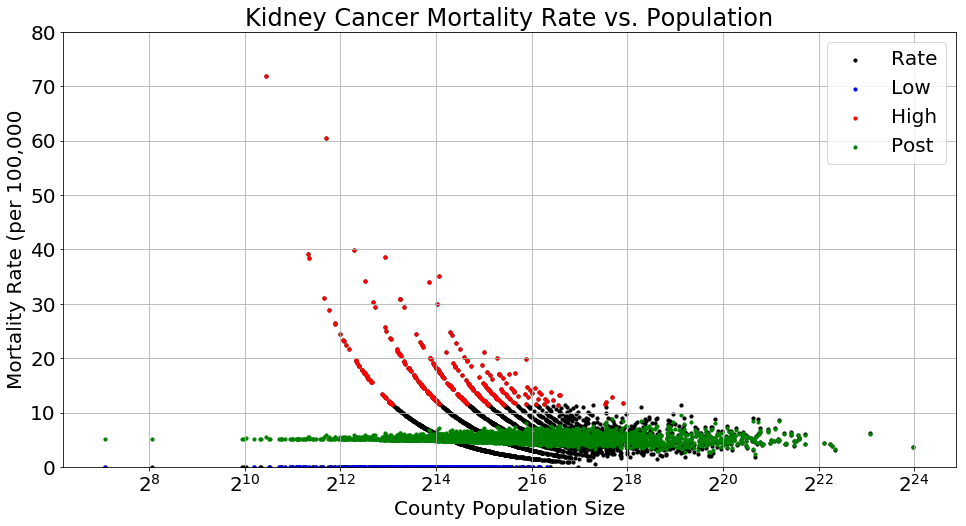

In [42]:
def make_plot(mortality_rates, post_means):
    """Plot kidney cancer mortality rate vs. population size"""
    # Plot the mortality rate * 100,000
    mortality_plot = mortality_rates * 100000
    # Generate mask with the lowest and highest 300 rates
    mask_lo = np.argpartition(mortality_rates, 300)[0:300]
    mask_hi = np.argpartition(mortality_rates, -300)[-300:]
    # Plot requested series 
    fig, ax = plt.subplots()
    fig.set_size_inches([16, 8])
    ax.set_title('Kidney Cancer Mortality Rate vs. Population')
    ax.set_xlabel('County Population Size')
    ax.set_ylabel('Mortality Rate (per 100,000')
    ax.set_xscale('log', basex=2)
    ax.set_ylim(0, 80)
    marker_size = 10
    color_fill = 1.0
    ax.scatter(ns, mortality_plot, color='k', label='Rate', s=marker_size, alpha=color_fill)
    ax.scatter(ns[mask_lo], mortality_plot[mask_lo], color='b', label='Low', s=marker_size, alpha=color_fill)
    ax.scatter(ns[mask_hi], mortality_plot[mask_hi], color='r', label='High', s=marker_size, alpha=color_fill)
    ax.scatter(ns, post_means*100000, color='g', label='Post', s=marker_size, alpha=color_fill)
    ax.grid()
    ax.legend()
    plt.show()

# Make the plots
make_plot(mortality_rates, post_means)

**2.5** As we can see in the plot above, the raw cancer rates are very noisy, especially for the smaller population counties.  For counties with a size 2^16 and below (about 65,000) there are typically some counties with a rate as low as zero, and other with rates as high as 10-70 cases per 100,000.  The overall mean rate is about 5.2 mortalities per 100,000 people.  The posterior means on the other hand compres outliers back towards the overall population mean.  This process is a form of regularization and gives a more informative estimate of the "likely" underlying cancer rate in each county.  As one example, we can see a data point for a county that has a population of about 2^(10.5) with a mortality rate above 70 / 100000.  This is the county of MacPherson, Nebraska, with one unlucky soul who perished from a population of 1392 people.  This shows up as a very high rate, but the posterior mean smooshes it back down toward the overall sample mean, estimating with an expected cancer incidence rate of 5.58 per 100,000, just a little bit over the population average.  The county with the highest posterior mean is Sarasota, FL, with 65 fatalities among 573,711 people, a rate of 11.3 per 100,000.  The posterior mean is 9.5 per per 100,000, indicating that the population in Sarasota is large enough that the model is only pulling it back down slightly to the prior.  Knowing a little about the demographics of the US, Sarasota is a place with a large population of older people, and it's not entirely surprising that it would have a high cancer rate.

<div class="answer-separator">
------------------------
</div>

### Q3: Martin Garrix, Tiesto, Marshmello on the 1s and 2s.  Is that a Mixture of Experts?

**Some coding required**

What if you had to predict a one-to-many function? The data provided below comes from a dataset generated by Chris Bishop (yes that Bishop) to explain the models mentioned in the title above. We have included a pdf from his book which describe these models in some detail. This problem will continure in future homework where we shall learn to sample from this model and also how to solve it using mixture density networks.

We read this data in...

In [2]:
df = pd.read_csv("one-to-many.csv")
df.head()

,target,x
0,0.000000,0.018727
1,0.001001,0.050424
2,0.002002,0.042375
3,0.003003,0.038596
4,0.004004,0.019352


...and then plot it. Notice both the uneven sampling (more towards the center), and the "more than one y" for a given x.

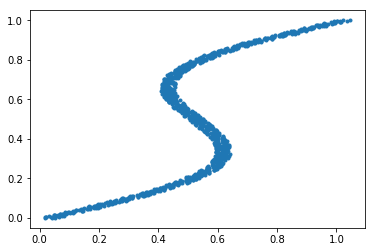

In [2]:
plt.plot(df.x, df.target, '.');

Normal regression approaches to modeling such a function wont work, as they expect the function to be a proper mathematical function, that is, single valued.

These kind of problems are called **inverse problems**, where more than one input state leads to an output state, and we have to try and model these multiple input states.

A mixture of gaussians (or other distributions) might is a sensible way to do this.

You choose one of the gaussians with some probability. The nean of the gaussian is then given by some regression function, say for example a straight line. We could additionally fix the standard deviation or model it as well. 

Thus, for each component Gaussian, we choose a functional form for the mean and standard deviation. So our model looks something like this:

$$f(x)  = \sum_i \lambda_i g_i (x) $$

Say we fit a model with 3 gaussians to this data. Such a model cannot fit the function above. Notice for example that at $x=0.2$ only one of the gaussians will dominate, different from the situation at $x=0.5$. This means that the probabilities of "belonging" to one or the other gaussians is also changing with $x$.

If we allow the mixing probabilities to depend on $x$, we can model this situation.

$$f(x)  = \sum_i \lambda_i (x) g_i (x) $$

Such a model is called a "mixture of experts" model. The idea is that one "expert" gaussian is responsible in one sector of the feature space, while another expert is responsible in another sector.

You can think of this model as implementing a "standard" gaussian mixture at each "point" x, with the added complexity that all of the means, standard deviations, and mixture probabilities change from one x to another.

See https://www.cs.toronto.edu/~hinton/absps/hme.pdf and http://www.ee.hacettepe.edu.tr/~eyuksel/Publications/2012_TwentyYearsofMixtureofExperts.pdf for more details. I found the latter clearer and easier to understand.

For this entire question you might find diagram code from [here](https://github.com/hardmaru/pytorch_notebooks/blob/master/mixture_density_networks.ipynb) useful. Take with attribution.

We will assume we have **3 gaussians**.

### Iterative Linear Regression Mixture of Experts Model

The basic idea, illustrated below, is to fit piecewise linear regressions iteratively in a EM style algorithm.

![](https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlo4e4ari3r4wd%2Fj9vjyzv62x149%2Fjnsuyq59tar%2Fmixreg0.png)

The algorithm looks like this: 

- Initialize the 1000 points in this dataset as randomly belonging to one of 3 "classes" or "clusters" or "experts". This takes a x-data problem and augments it with a fake z data point that tells us whether the point belongs in cluster 0, 1, or 2. (It helps convergence to say that points in the leftmost 0.2 belong to cluster 0 and righmost 0.2 to cluster 2).

- With the fake z's in hand the 1000 points can be separated (based on cluster assignment) into 3 sets of points and used to fit 3 linear regression models. 

- Predictions can be made for all 1000 points on the data for each of the 3 regression lines. Reassign each data point to a cluster by choosing the cluster that minimizes the prediction error based on the squared distances between its actual y value and the 3 cluster predictions.

- Rinse and repeat.

3.1. We stated that "*It helps convergence to say that points in the leftmost 0.2 belong to cluster 0 and righmost 0.2 to cluster 2*".  Why might it help convergence to define an initial cluster assignment as opposed to random assignment?

3.2. Specify a potential convergence criterion to use.  Why might you choose it?

3.3. Implement the algorithm we described along with the convergence criterion you chose in 3.2.  You can use a linear regression fitter of your choice (statsmodels, sklearn, your own...).

3.4. Apply your algorithm in the data in the `df` dataframe to produce a diagram like the one above which illustrates the straight line fits as well as the cluster belonging. 


**Note for those who want to read more** The mixture of experts can be implemented using Expectation Maximization using iteratively-reweighted least squares. Our method in A was merely an approximation to this process. You can find update equations [here](https://people.eecs.berkeley.edu/~jordan/papers/jordan-xu.ps)

**Gratuitous Titular Reference**:  [DJs](https://martingarrix.com/), [DJs](https://www.tiesto.com/), [DJs](https://marshmellomusic.com/).

<div class="answer-separator">
------------------------
</div>